In [128]:
import numpy as np
import pandas as pd
import json
import os
import seaborn as sb
from matplotlib import pyplot as plt, rcParams

%matplotlib inline
#rcParams['figure.figsize'] = 5, 4

In [129]:
data = {"year": [], "commit_sha": [], "total_lines": [], "code_lines": [],
        "blank_lines": [],
        "comment_lines": [],
        "complexity": [],
        }
for file in os.scandir("data/LOC_and_Complexity"):
    if file.is_file and file.name.endswith(".json"):
        data_file = open(file)
        data_file = json.load(data_file)
        for language in data_file:
            if language["Name"] == "C" or language["Name"] == "C++":
                print(language)
                #appends last so order is maintained
                data["year"].append(file.name[:4])
                data["commit_sha"].append(file.name[9:16])
                data["total_lines"].append(language["Lines"])
                data["blank_lines"].append(language["Blank"])
                data["comment_lines"].append(language["Comment"])
                data["code_lines"].append(language["Code"])
                data["complexity"].append(language["Complexity"])

data

data = pd.DataFrame(data)
data

{'Name': 'C', 'Bytes': 851678, 'CodeBytes': 0, 'Lines': 25631, 'Code': 17778, 'Comment': 4609, 'Blank': 3244, 'Complexity': 4079, 'Count': 32, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 934718, 'CodeBytes': 0, 'Lines': 28353, 'Code': 19825, 'Comment': 5016, 'Blank': 3512, 'Complexity': 4667, 'Count': 35, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 1012838, 'CodeBytes': 0, 'Lines': 31195, 'Code': 22093, 'Comment': 5255, 'Blank': 3847, 'Complexity': 5422, 'Count': 37, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 1099575, 'CodeBytes': 0, 'Lines': 33049, 'Code': 23333, 'Comment': 5630, 'Blank': 4086, 'Complexity': 5879, 'Count': 37, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 1130411, 'CodeBytes': 0, 'Lines': 33954, 'Code': 23842, 'Comment': 5847, 'Blank': 4265, 'Complexity': 6004, 'Count': 38, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 1128557, 'CodeBytes': 0, 'Lines': 33726, 'Code': 23712, 'Comment': 57

,year,commit_sha,total_lines,code_lines,blank_lines,comment_lines,complexity
0,2012,3b62de3,25631,17778,3244,4609,4079
1,2013,f044635,28353,19825,3512,5016,4667
2,2014,c34dd6b,31195,22093,3847,5255,5422
3,2015,67bd7d4,33049,23333,4086,5630,5879
4,2016,c23ead2,33954,23842,4265,5847,6004
5,2017,7ab96cc,33726,23712,4241,5773,5904
6,2018,b29110c,31529,22149,4040,5340,5571
7,2019,b8b04e3,33607,23056,4463,6088,5911
8,2020,bb51a8b,31248,20497,4386,6365,6381
9,2021,827170f,32017,20976,4488,6553,6474


25895.6875

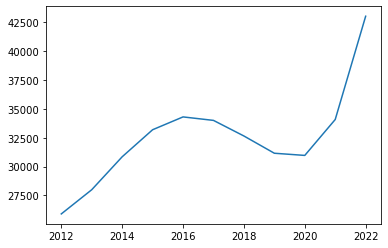

In [130]:
res = np.polyfit(x=[float(year) for year in data["year"].values], y=data["total_lines"].values,deg=4)
poly1d_fn = np.poly1d(res)
fig, ax = plt.subplots()
ax.plot([float(year) for year in data["year"].values.ravel()], poly1d_fn([float(year) for year in data["year"].values]))
ax.ticklabel_format(useOffset=False, style='plain')

poly1d_fn(2012)

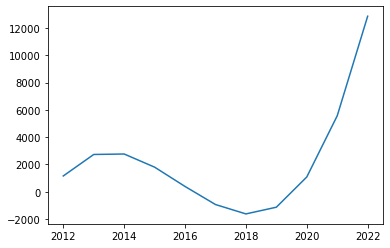

In [131]:
dev = poly1d_fn.deriv(m=1)
plt.plot([float(year) for year in data["year"].values.ravel()], dev([float(year) for year in data["year"].values.ravel()]))
plt.show()

In [132]:
#fig, axes = plt.subplots(1, 1, figsize=(10, 5))
#sb.regplot(x="year", y="total_lines", data=data, ax=axes, order=3, ci=None)

print(data[(data["year"] == "2012")]["total_lines"])
print(data[(data["year"] == "2022")]["total_lines"])

0    25631
Name: total_lines, dtype: int64
10    43874
Name: total_lines, dtype: int64


In [133]:
def draw_plot(x_labels: list, x_label: str, values: list, y_label: str, title: str,
              save_path: str):
    fig, axes = plt.subplots(1, 1, figsize=(10, 5))
    ind = np.arange(len(x_labels))
    width = .75
    axes.bar(ind, values, width)
    axes.grid(visible=True, axis="y")
    axes.set_xticks(ticks=np.array(range(len(x_labels))))
    axes.set_xticklabels(x_labels)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    #axes.set_title(title)
    fig.savefig(save_path, format='svg', dpi=1200)

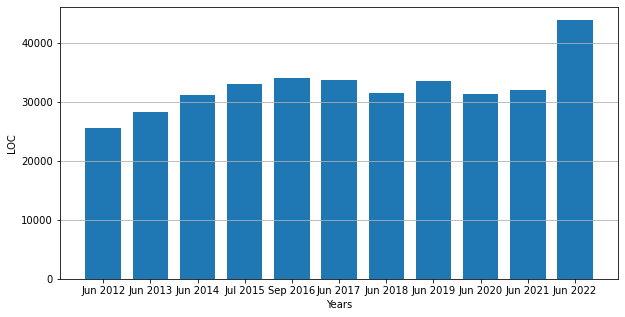

In [134]:
horizontal_labels = ["Jun 2012",
                     "Jun 2013",
                     "Jun 2014",
                     "Jul 2015",
                     "Sep 2016",
                     "Jun 2017",
                     "Jun 2018",
                     "Jun 2019",
                     "Jun 2020",
                     "Jun 2021",
                     "Jun 2022"]
draw_plot(horizontal_labels, x_label="Years", values=data["total_lines"],
          y_label="LOC", title="LOC in ODIN_II", save_path="figures/LOC/01_scc_year_vs_total_lines.svg")

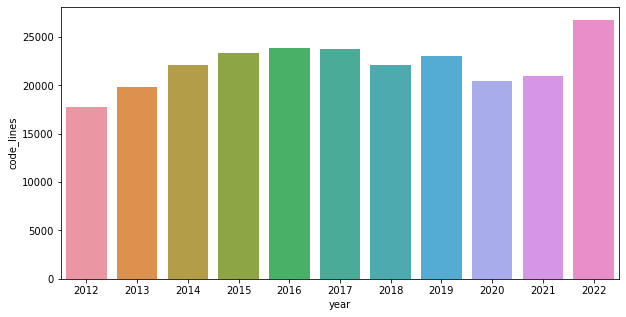

In [135]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.barplot(x="year", y="code_lines", data=data, ax=axes)
fig.savefig("figures/LOC/scc_year_vs_code_lines.jpg")

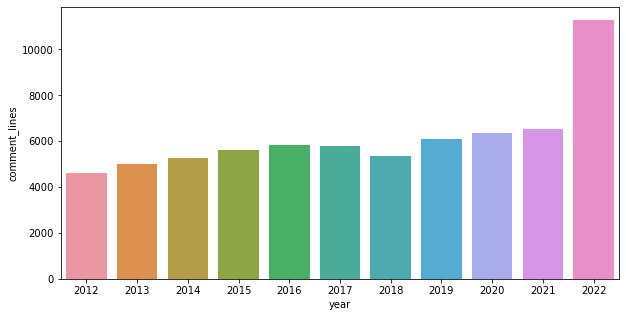

In [136]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.barplot(x="year", y="comment_lines", data=data, ax=axes)
fig.savefig("figures/LOC/scc_year_vs_comment_lines.jpg")

How is the percentage in each year between code, comments and blanks

C:\Users\GUILLE~1\AppData\Local\Temp/ipykernel_12084/2324772244.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


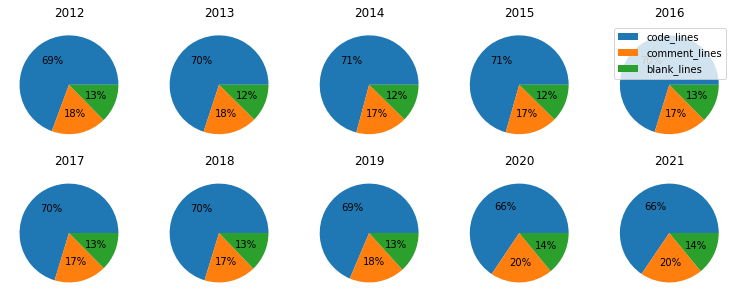

In [137]:
fig, axes = plt.subplots(2, 5, figsize=(13, 5))
percentage_per_year = []
y_counter = 0
x_counter = 0
for year in ["2012", "2013", "2014","2015", "2016","2017","2018","2019","2020","2021"]:
    for row_name in ["code_lines", "comment_lines", "blank_lines"]:
        percentage_per_year.append(data[data["year"] == year][row_name].values.ravel()[0])
    axes[y_counter][x_counter].pie(percentage_per_year, autopct='%.0f%%')
    axes[y_counter][x_counter].set_title(year)
    x_counter += 1
    if year == "2016":
        y_counter += 1
        x_counter = 0
    percentage_per_year = []
axes[0][4].legend(["code_lines", "comment_lines", "blank_lines"])
fig.set_label(["code_lines", "comment_lines", "blank_lines"])

fig.show()

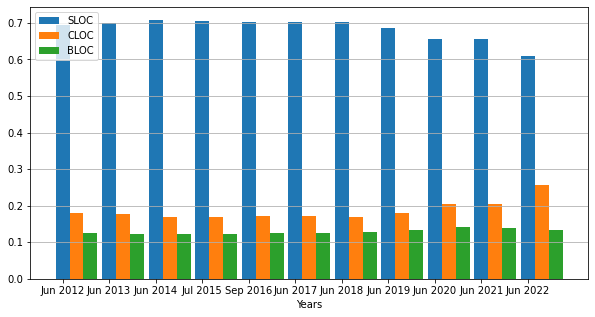

In [193]:
horizontal_labels = ["Jun 2012",
                     "Jun 2013",
                     "Jun 2014",
                     "Jul 2015",
                     "Sep 2016",
                     "Jun 2017",
                     "Jun 2018",
                     "Jun 2019",
                     "Jun 2020",
                     "Jun 2021",
                     "Jun 2022"]
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(data["code_lines"].values))
width = 0.3
axes.bar(ind, data["code_lines"].values/data["total_lines"].values, width, label="SLOC")
axes.bar(ind+width, data["comment_lines"].values/data["total_lines"].values, width, label="CLOC")
axes.bar(ind+width*2, data["blank_lines"].values/data["total_lines"].values, width, label="BLOC")
axes.legend(loc='upper left')
axes.set_xlabel("Years")
#axes.set_title("Proportions of LOC in percent")
axes.set_xticks(ticks=list(range(11)))
axes.set_xticklabels(horizontal_labels)
axes.grid(visible=True, axis="y")
fig.savefig("figures/LOC/06_scc_year_vs_proportion_loc.svg", format='svg', dpi=1200)

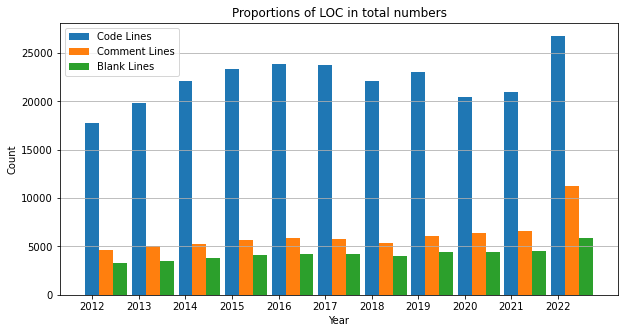

In [139]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(data["code_lines"].values))
width = 0.3
axes.bar(ind, data["code_lines"].values, width, label="Code Lines")
axes.bar(ind+width, data["comment_lines"].values, width, label="Comment Lines")
axes.bar(ind+width*2, data["blank_lines"].values, width, label="Blank Lines")
axes.legend(loc='upper left')
axes.set_xlabel("Year")
axes.set_ylabel("Count")
axes.set_title("Proportions of LOC in total numbers")
axes.set_xticks(ticks=list(range(11)))
axes.set_xticklabels(data["year"].values)
axes.grid(visible=True, axis="y")
fig.savefig("figures/LOC/scc_year_vs_loc_split.jpg")

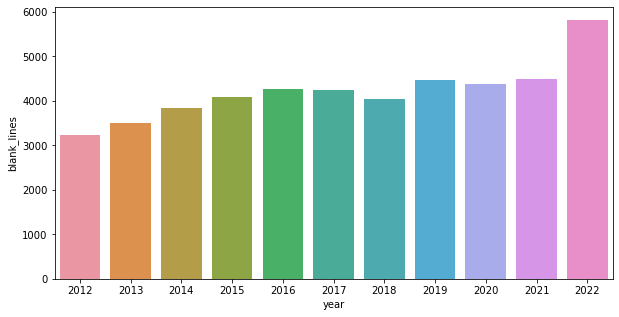

In [140]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.barplot(x="year", y="blank_lines", data=data, ax=axes)
fig.savefig("figures/LOC/scc_year_vs_blank_lines.jpg")

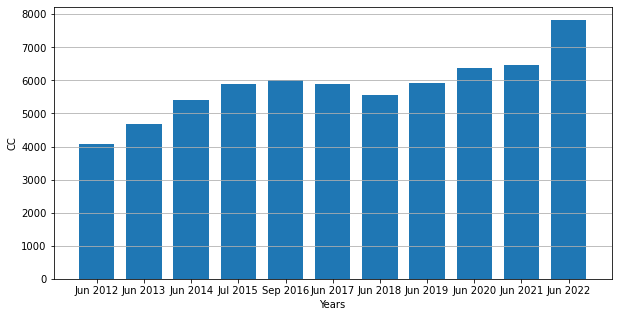

In [141]:
horizontal_labels = ["Jun 2012",
                     "Jun 2013",
                     "Jun 2014",
                     "Jul 2015",
                     "Sep 2016",
                     "Jun 2017",
                     "Jun 2018",
                     "Jun 2019",
                     "Jun 2020",
                     "Jun 2021",
                     "Jun 2022"]
draw_plot(horizontal_labels, x_label="Years", values=data["complexity"],
          y_label="CC", title="Cyclomatic Complexity per year in ODIN_II", save_path="figures/Comp/04_scc_year_vs_complexity.svg")


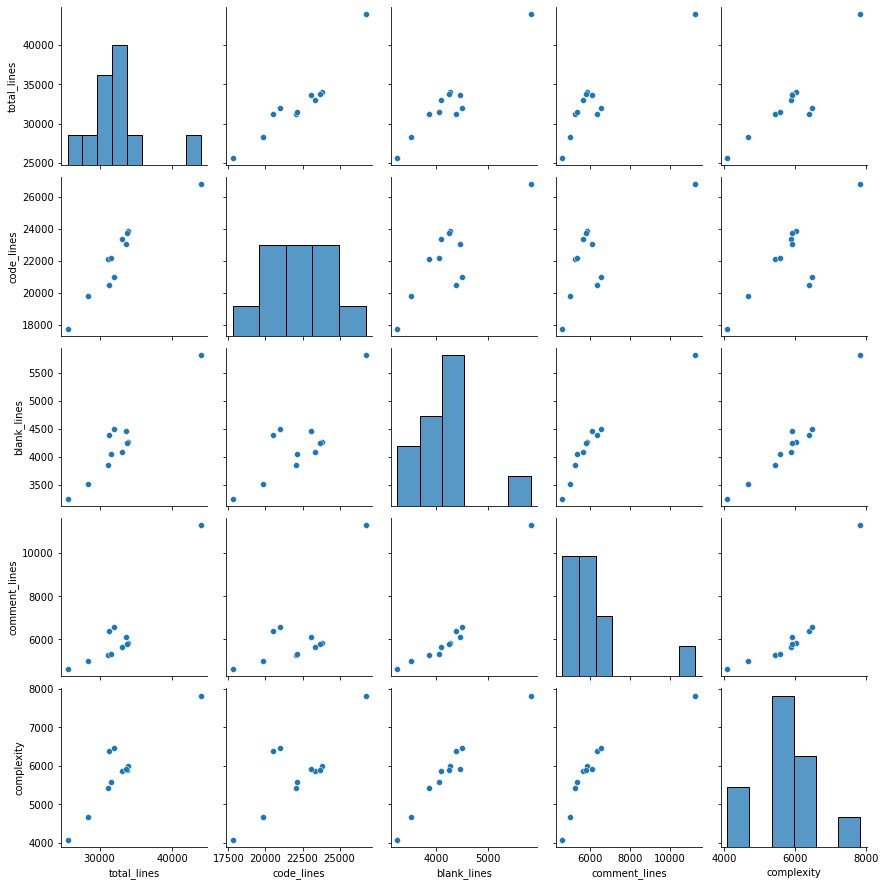

In [142]:
sb.pairplot(data)

import Code coverage

In [143]:
coverage = {
    "year": [],
    "code_coverage": [],
    "function_coverage": [],
    "commit_sha": [],
}

def compute_precentage(coverage_dict: dict) -> float:
    res = 0
    for value in coverage_dict:
        res += float(coverage_dict[value])
    return res / len(coverage_dict)

for file in os.scandir("data/CodeCoverage"):
    if file.is_file and file.name == "coverage.json":
        data_file = open(file)
        data_file = json.load(data_file)
        print(data_file)
        for key in data_file:
            precen_line = round(compute_precentage(data_file[key]["LineCoverage"]), 2)
            precen_func = round(compute_precentage(data_file[key]["FuncCoverage"]), 2)
            year, month, commit = key.split("_", maxsplit=2)
            coverage["year"].append(int(year))
            coverage["commit_sha"].append(commit)
            coverage["code_coverage"].append(precen_line)
            coverage["function_coverage"].append(precen_func)
coverage = pd.DataFrame(coverage)

coverage


{'2012_Jun_3b62de3': {'LineCoverage': {'SRC': '66.1'}, 'FuncCoverage': {'SRC': '71.7'}}, '2015_Jul_67bd7d4': {'LineCoverage': {'SRC': '48.9'}, 'FuncCoverage': {'SRC': '64.5'}}, '2016_Sep_c23ead2': {'LineCoverage': {'SRC': '48.5'}, 'FuncCoverage': {'SRC': '63.5'}}, '2017_Jun_7ab96cc': {'LineCoverage': {'SRC': '58.6'}, 'FuncCoverage': {'SRC': '68.2'}}, '2018_Jun_a704d87': {'LineCoverage': {'ODIN_II/SRC': '75.8', 'ODIN_II/SRC/DEBUG_TOOLS': '0.0\xa0', 'ODIN_II/SRC/PARSE_TOOL': '53.3', 'ODIN_II/SRC/SIM_TOOLS': '58.8', 'ODIN_II/SRC/STRING_HASH_TOOL': '87.9', 'ODIN_II/SRC/lib_ast': '44.0', 'ODIN_II/SRC/lib_blif': '78.0', 'ODIN_II/SRC/lib_blocks': '57.4', 'ODIN_II/SRC/lib_netlist': '72.9'}, 'FuncCoverage': {'ODIN_II/SRC': '74.4', 'ODIN_II/SRC/DEBUG_TOOLS': '0.0\xa0', 'ODIN_II/SRC/PARSE_TOOL': '57.7', 'ODIN_II/SRC/SIM_TOOLS': '65.0', 'ODIN_II/SRC/STRING_HASH_TOOL': '66.7', 'ODIN_II/SRC/lib_ast': '53.2', 'ODIN_II/SRC/lib_blif': '92.7', 'ODIN_II/SRC/lib_blocks': '72.2', 'ODIN_II/SRC/lib_netlist':

,year,code_coverage,function_coverage,commit_sha
0,2012,66.10,71.70,3b62de3
1,2015,48.90,64.50,67bd7d4
2,2016,48.50,63.50,c23ead2
3,2017,58.60,68.20,7ab96cc
4,2018,58.68,62.52,a704d87
5,2019,62.50,76.00,b8b04e3
6,2020,74.90,80.10,bb51a8b
7,2021,77.20,82.60,827170f
8,2022,63.50,70.30,a6538ac


In [144]:
coverage = coverage.append({"year": 2013, "code_coverage": 66.10, "function_coverage": 71.10,
                 "commit_sha": "Fake"}, ignore_index=True,sort=True)
coverage = coverage.append({"year": 2014, "code_coverage": 66.10, "function_coverage": 71.10,
                 "commit_sha": "Fake"}, ignore_index=True, sort=True)

coverage.sort_values(by=['year'])

,code_coverage,commit_sha,function_coverage,year
0,66.10,3b62de3,71.70,2012
9,66.10,Fake,71.10,2013
10,66.10,Fake,71.10,2014
1,48.90,67bd7d4,64.50,2015
2,48.50,c23ead2,63.50,2016
3,58.60,7ab96cc,68.20,2017
4,58.68,a704d87,62.52,2018
5,62.50,b8b04e3,76.00,2019
6,74.90,bb51a8b,80.10,2020
7,77.20,827170f,82.60,2021


In [145]:
#coverage.set_index(keys=["year"])
coverage = coverage.sort_values(by=['year'])
coverage

,code_coverage,commit_sha,function_coverage,year
0,66.10,3b62de3,71.70,2012
9,66.10,Fake,71.10,2013
10,66.10,Fake,71.10,2014
1,48.90,67bd7d4,64.50,2015
2,48.50,c23ead2,63.50,2016
3,58.60,7ab96cc,68.20,2017
4,58.68,a704d87,62.52,2018
5,62.50,b8b04e3,76.00,2019
6,74.90,bb51a8b,80.10,2020
7,77.20,827170f,82.60,2021


In [146]:
for i in  coverage["code_coverage"]:
    print(i)

66.1
66.1
66.1
48.9
48.5
58.6
58.68
62.5
74.9
77.2
63.5


#Increase in LOC AND complexity



In [147]:
increase_coverage = []
increase_nloc = []
increase_complexity = []
increase_comments = []
increase_blanks = []
years = []
base_coverage = 0
base_nloc = 0
base_comp = 0
base_comment = 0
base_blanks = 0
for  nloc, complexity, comments, blanks, code_coverage,year in zip(data["code_lines"], data["complexity"], data["comment_lines"],data["blank_lines"],coverage["code_coverage"], data["year"]):
    if year == "2012":
        base_coverage = code_coverage
        base_nloc = nloc
        base_comp = complexity
        base_comment = comments
        base_blanks = blanks
        continue
    years.append(year)
    increase_blanks.append((blanks - base_blanks)/base_blanks)
    increase_comments.append((comments - base_comment)/base_comment)
    increase_nloc.append((nloc - base_nloc)/base_nloc)
    increase_complexity.append((complexity - base_comp)/base_comp)
    increase_coverage.append((code_coverage - base_coverage)/base_coverage)
    base_nloc = nloc
    base_blanks = blanks
    base_comment = comments
    base_comp = complexity
    base_coverage = code_coverage
increase_complexity

[0.14415297867124297,
 0.16177415898864367,
 0.08428624123939506,
 0.021262119408062597,
 -0.016655562958027982,
 -0.056402439024390245,
 0.06103033566684617,
 0.07951277279648114,
 0.01457451810061119,
 0.20929873339511892]

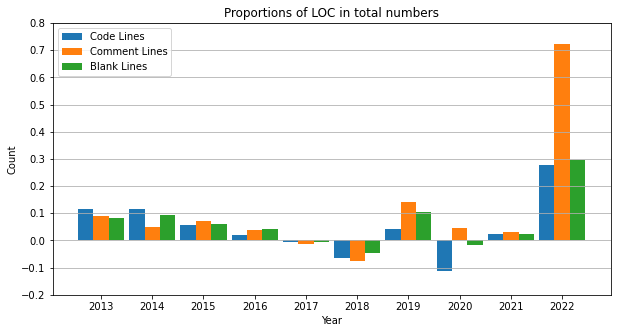

In [148]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = 0.3
axes.bar(ind, increase_nloc, width, label="Code Lines")
axes.bar(ind+width, increase_comments, width, label="Comment Lines")
axes.bar(ind+width*2, increase_blanks, width, label="Blank Lines")
axes.legend(loc='upper left')
axes.set_xlabel("Year")
axes.set_ylabel("Count")
axes.set_title("Proportions of LOC in total numbers")
#axes.set_xticks(ticks=list(range(len(years))))
axes.set_xticks(ticks=np.array(range(len(years))) + 0.15 *2)
axes.set_yticks(np.linspace(start=-0.2, stop=0.8, num=11))
axes.set_xticklabels(years)
axes.grid(visible=True, axis="y")


In [149]:
hal_data = {"year": [], "commit_sha": [],
        "file_name": [],
        "h_volume": [],
        "h_length": [],
        "h_voc": [],
        "distinct_operators": [],
        "distinct_operands": []
        }

for file in os.scandir("data/halstead/"):
    if file.is_file and file.name.endswith(".json"):
        data_file = open(file)
        data_file = json.load(data_file)
        for source_file in data_file:

            hal_data["year"].append(int(file.name[:4]))
            hal_data["commit_sha"].append(file.name[9:16])
            hal_data["file_name"].append(source_file)
            hal_data["h_volume"].append(data_file[source_file]["h_volume"])

            hal_data["h_length"].append(data_file[source_file]["h_length"])
            hal_data["h_voc"].append(data_file[source_file]["h_voc"])
            hal_data["distinct_operators"].append(data_file[source_file]["distinct_operators"])
            hal_data["distinct_operands"].append(data_file[source_file]["distinct_operands"])

hal_data = pd.DataFrame(hal_data)
hal_data

,year,commit_sha,file_name,h_volume,h_length,h_voc,distinct_operators,distinct_operands
0,2012,3b62de3,activity_estimation.c,31025.556223,4197,168,60,108
1,2012,3b62de3,ast_optimizations.c,7311.103044,1129,89,51,38
2,2012,3b62de3,ast_util.c,37973.897716,5102,174,80,94
3,2012,3b62de3,errors.c,1236.784119,234,39,25,14
4,2012,3b62de3,hard_blocks.c,9167.987844,1386,98,44,54
...,...,...,...,...,...,...,...,...
386,2022,a6538ac,subtractions.cpp,39914.709148,5165,212,77,135
387,2022,a6538ac,Verilog.cpp,-1.000000,0,0,0,0
388,2022,a6538ac,VerilogReader.cpp,256.763925,54,27,20,7
389,2022,a6538ac,VerilogWriter.cpp,3803.282445,570,102,45,57


In [150]:
yearss = [2012, 2013, 2014,2015, 2016,2017,2018,2019,2020,2021, 2022]
cum_h_length = []
for i in yearss:
    length_year = 0
    for value in hal_data[hal_data["year"] == i]["h_length"]:
        length_year += value
    cum_h_length.append(length_year)
cum_h_length

[107963,
 121350,
 135237,
 145868,
 149321,
 150018,
 142200,
 146734,
 150520,
 152135,
 192762]

In [151]:
h_length_increase = []
for i in range(len(cum_h_length) - 1):
    h_length_increase.append((cum_h_length[i + 1]-cum_h_length[i])/cum_h_length[i])
h_length_increase

[0.12399618387780999,
 0.11443757725587145,
 0.07861014367369877,
 0.02367208709243974,
 0.004667796224241735,
 -0.052113746350437945,
 0.031884669479606186,
 0.025801790995951857,
 0.010729471166622376,
 0.2670457159759424]

In [152]:
increase_nloc, h_length_increase

([0.11514231072111598,
  0.11440100882723833,
  0.05612637486986828,
  0.021814597351390734,
  -0.0054525627044711015,
  -0.06591599190283401,
  0.040949930019413966,
  -0.11099063150589868,
  0.023369273552227156,
  0.2758867276887872],
 [0.12399618387780999,
  0.11443757725587145,
  0.07861014367369877,
  0.02367208709243974,
  0.004667796224241735,
  -0.052113746350437945,
  0.031884669479606186,
  0.025801790995951857,
  0.010729471166622376,
  0.2670457159759424])

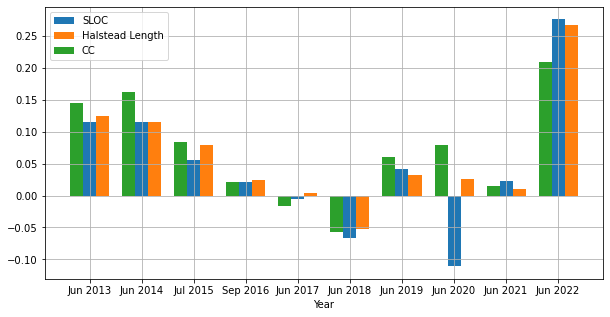

In [192]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(0,len(years) *2 , 2)
width = 0.5
horizontal_labels = ["Jun 2013",
                     "Jun 2014",
                     "Jul 2015",
                     "Sep 2016",
                     "Jun 2017",
                     "Jun 2018",
                     "Jun 2019",
                     "Jun 2020",
                     "Jun 2021",
                     "Jun 2022"]
axes.bar(ind, increase_nloc, width, label="SLOC")
axes.bar(ind+width, h_length_increase, width, label="Halstead Length")
axes.bar(ind-width, increase_complexity, width, label="CC")
axes.legend(loc='upper left')
axes.set_xlabel("Year")
#axes.set_ylabel("%")
axes.set_xticks(ticks=ind)
#axes.set_title("Growth rates of SLOC, CC and Halstead Length")
axes.set_xticklabels(horizontal_labels)
axes.grid(visible=True)
fig.savefig("figures/05_SLOC_vs_CC_vs_h_length.svg", format='svg', dpi=1200)

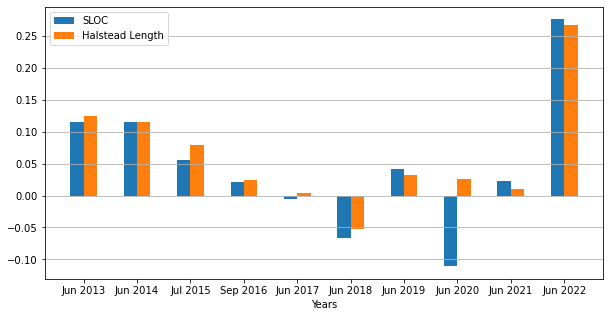

In [191]:
horizontal_labels = ["Jun 2013",
                     "Jun 2014",
                     "Jul 2015",
                     "Sep 2016",
                     "Jun 2017",
                     "Jun 2018",
                     "Jun 2019",
                     "Jun 2020",
                     "Jun 2021",
                     "Jun 2022"]
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(0,len(years) *2 , 2)
width = 0.5
axes.bar(ind-width/2, increase_nloc, width, label="SLOC")
axes.bar(ind+width/2, h_length_increase, width, label="Halstead Length")
axes.legend(loc='upper left')
axes.set_xlabel("Years")
#axes.set_ylabel("%")
axes.set_xticks(ticks=ind)
#axes.set_title("Growth rates of SLOC and Halstead Length")
axes.set_xticklabels(horizontal_labels)
axes.grid(visible=True, axis="y")
fig.savefig("figures/03_sloc_vs_halstead_len.svg", format='svg', dpi=1200)

[0 1 2 3 4 5 6 7 8 9]


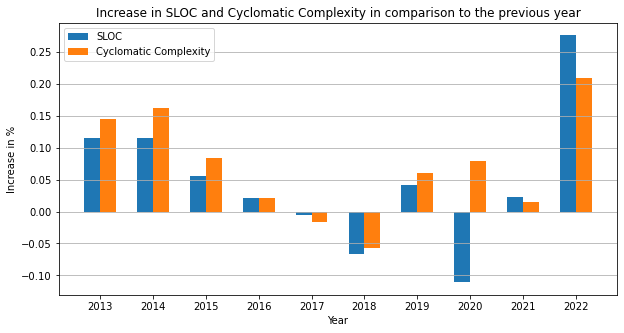

In [155]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = 0.3
print(ind)
axes.bar(ind-width/2, increase_nloc, width, label="SLOC")
axes.bar(ind+width/2, increase_complexity, width, label="Cyclomatic Complexity")
axes.legend(loc='upper left')
axes.set_xlabel("Year")
axes.set_ylabel("Increase in %")
axes.set_title("Increase in SLOC and Cyclomatic Complexity in comparison to the previous year")
axes.set_xticks(ticks=list(range(len(years))))
axes.set_xticklabels(years)
axes.grid(visible=True, axis="y")
fig.savefig("figures/scc_year_vs_increase_in_nloc_complexity.jpg")

[0 1 2 3 4 5 6 7 8 9]


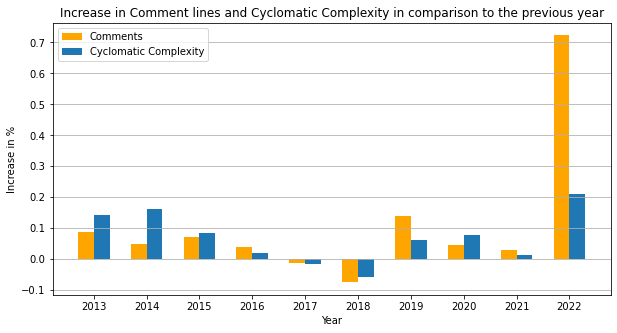

In [156]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = 0.3
print(ind)
axes.bar(ind-width/2, increase_comments, width, label="Comments", color="orange")
axes.bar(ind+width/2, increase_complexity, width, label="Cyclomatic Complexity")
axes.legend(loc='upper left')
axes.set_xlabel("Year")
axes.set_ylabel("Increase in %")
axes.set_title("Increase in Comment lines and Cyclomatic Complexity in comparison to the previous year")
axes.set_xticks(ticks=list(range(len(years))))
axes.set_xticklabels(years)
axes.grid(visible=True, axis="y")
fig.savefig("figures/scc_year_vs_increase_in_nloc_complexity.jpg")


## Explore scc --by-file data


#show how seaborn/panda handle NAN values (they just ignore them!)
pure_2012_data = {"2012": []}
for i in loc_file_tracking.T["2012"]:
    if not pd.isna(i):
        pure_2012_data["2012"].append(i)
res = pd.DataFrame(pure_2012_data)
res
sb.boxplot(data=res)

In [157]:
def get_loc_per_file():
    loc_file_tracking = {"year": [],
                         "loc_per_file": [],
                         "complex_per_file": [],
                         "comment_per_file": [],
                         "blank_per_file": [],
                         "filename": []}
    for file in os.scandir("data/LOC_and_Complexity/byfile"):
        file_year = file.name[:4]
        if file.is_file and file.name.endswith(".json"):
            data_file = open(file)
            data_file = json.load(data_file)
            for odin_file in data_file:
                if odin_file["Name"] == "C" or odin_file["Name"] == "C++":
                    for stats_file in odin_file["Files"]:
                        filename, filetype = stats_file["Filename"].split(".")
                        loc_file_tracking["year"].append(file_year)
                        loc_file_tracking["loc_per_file"].append(stats_file["Lines"])
                        loc_file_tracking["complex_per_file"].append(stats_file["Complexity"])
                        loc_file_tracking["filename"].append(stats_file["Filename"])
                        loc_file_tracking["comment_per_file"].append(stats_file["Comment"])
                        loc_file_tracking["blank_per_file"].append(stats_file["Blank"])
    return pd.DataFrame(loc_file_tracking)
loc_file_tracking = get_loc_per_file()

<AxesSubplot:xlabel='complex_per_file', ylabel='comment_per_file'>

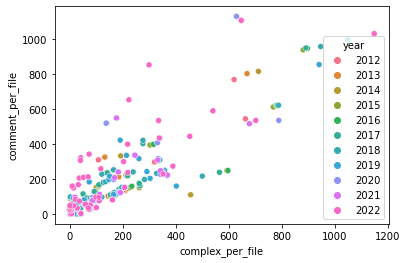

In [158]:
loc_file_tracking
sb.scatterplot(x="complex_per_file", y="comment_per_file", hue="year",data=loc_file_tracking)

In [159]:
#loc_file_tracking_2022 = loc_file_tracking.values
loc_file_tracking_2019_2022 = loc_file_tracking[(loc_file_tracking["year"] == "2022")]
loc_file_tracking_2019_2022.corr("spearman")

,loc_per_file,complex_per_file,comment_per_file,blank_per_file
loc_per_file,1.000000,0.900310,0.892694,0.967553
complex_per_file,0.900310,1.000000,0.751895,0.942773
comment_per_file,0.892694,0.751895,1.000000,0.837597
blank_per_file,0.967553,0.942773,0.837597,1.000000


In [160]:
loc_file_tracking_2012_2015 = loc_file_tracking[(loc_file_tracking["year"] == "2012")
                                                | (loc_file_tracking["year"] == "2013")
                                                | (loc_file_tracking["year"] == "2014")
                                                | (loc_file_tracking["year"] == "2015")]
loc_file_tracking_2012_2015.corr("spearman")

,loc_per_file,complex_per_file,comment_per_file,blank_per_file
loc_per_file,1.000000,0.925011,0.945164,0.987735
complex_per_file,0.925011,1.000000,0.861614,0.919322
comment_per_file,0.945164,0.861614,1.000000,0.949018
blank_per_file,0.987735,0.919322,0.949018,1.000000


In [161]:
loc_file_tracking.corr("spearman")

,loc_per_file,complex_per_file,comment_per_file,blank_per_file
loc_per_file,1.000000,0.929465,0.933010,0.979950
complex_per_file,0.929465,1.000000,0.841024,0.924864
comment_per_file,0.933010,0.841024,1.000000,0.917962
blank_per_file,0.979950,0.924864,0.917962,1.000000


In [162]:
file_count = []
years = list(set(loc_file_tracking["year"].values))
years.sort()
for year in years:
    file_count.append(len(loc_file_tracking[loc_file_tracking["year"] == year]))
file_count

[32, 35, 37, 37, 38, 37, 29, 30, 31, 33, 52]

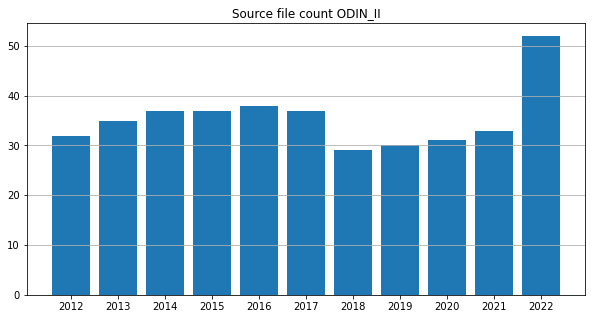

In [163]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.bar(years, file_count)
axes.set_title("Source file count ODIN_II")
axes.grid(visible=True, axis="y")
fig.savefig("figures/scc_year_vs_file_count.jpg")

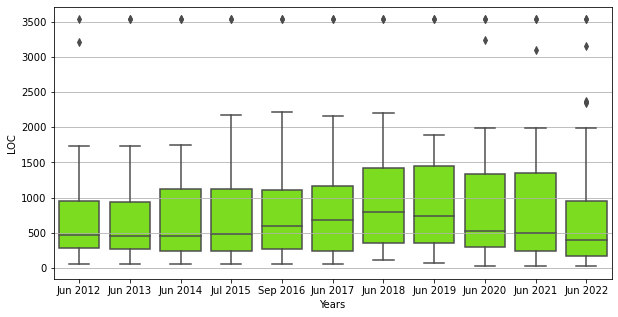

In [195]:
loc_file_tracking["loc_per_file"].clip(upper=loc_file_tracking["loc_per_file"].quantile(.95), inplace=True)
horizontal_labels = ["Jun 2012",
                     "Jun 2013",
                     "Jun 2014",
                     "Jul 2015",
                     "Sep 2016",
                     "Jun 2017",
                     "Jun 2018",
                     "Jun 2019",
                     "Jun 2020",
                     "Jun 2021",
                     "Jun 2022"]
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="loc_per_file", data=loc_file_tracking, ax=axes, color="lawngreen")
axes.grid(visible=True, axis="y")
axes.set_xticklabels(horizontal_labels)
axes.set_xlabel("Years")
axes.set_ylabel("LOC")
#axes.set_title("LOC per file (upper bound 95 quantile)")
fig.savefig("figures/LOC/08_scc_year_vs_loc_per_file.svg", format='svg', dpi=1200)

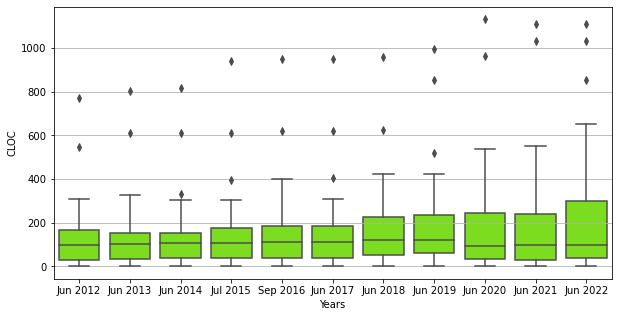

In [194]:
horizontal_labels = ["Jun 2012",
                     "Jun 2013",
                     "Jun 2014",
                     "Jul 2015",
                     "Sep 2016",
                     "Jun 2017",
                     "Jun 2018",
                     "Jun 2019",
                     "Jun 2020",
                     "Jun 2021",
                     "Jun 2022"]
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="comment_per_file", data=loc_file_tracking, ax=axes, color="lawngreen")
axes.grid(visible=True, axis="y")
#axes.set_title("Comment lines per file")
axes.set_xlabel("Years")
axes.set_ylabel("CLOC")
axes.set_xticklabels(horizontal_labels)
fig.savefig("figures/LOC/07_scc_year_vs_comment_per_file.svg", format='svg', dpi=1200)


Text(0.5, 1.0, 'Blank lines per file')

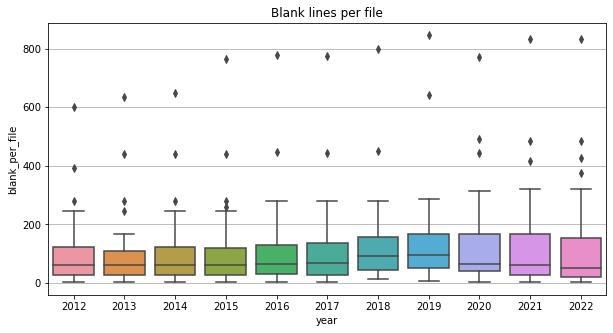

In [166]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="blank_per_file", data=loc_file_tracking, ax=axes)
axes.grid(visible=True, axis="y")
axes.set_title("Blank lines per file")

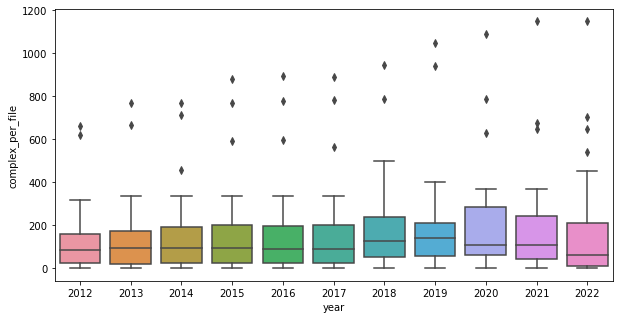

In [167]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="complex_per_file", data=loc_file_tracking, ax=axes)
fig.savefig("figures/Comp/scc_year_vs_complex_per_file.jpg")

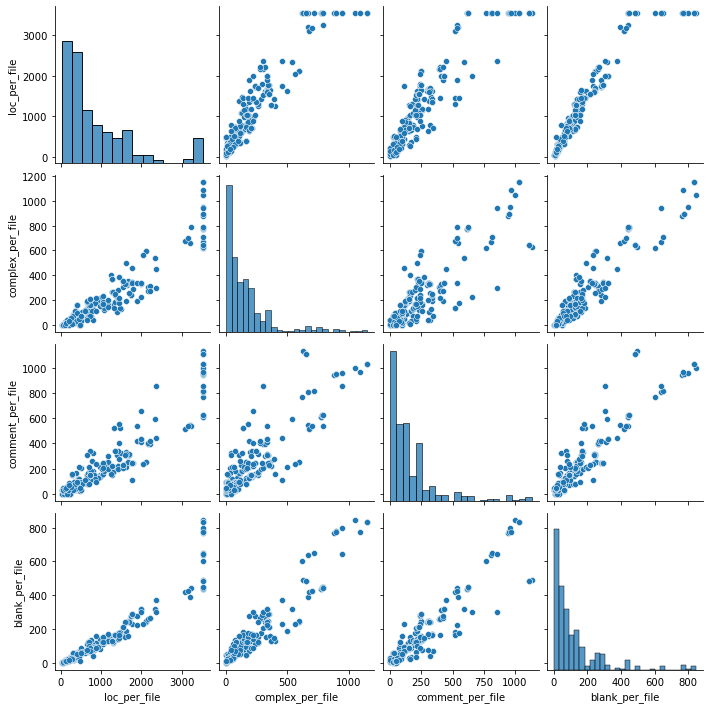

In [168]:
figs = sb.pairplot(loc_file_tracking)

In [169]:
loc_file = get_loc_per_file()

#loc_file[loc_file["complex_per_file"] > loc_file["complex_per_file"].quantile(.90)]

391


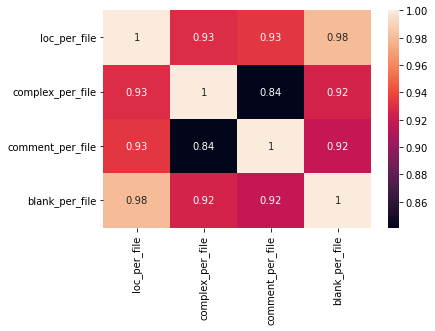

In [170]:
sb.heatmap(loc_file_tracking.corr("spearman"), annot=True)
print(len(loc_file_tracking))

Explore lizard data

In [171]:
loc_per_method = {"file_name": [],
                  "year": [],
                  "avg_nloc": [],
                  "avg_cyclo_comp": []}
for file in os.scandir("data/LOC_and_Complexity/byfile/bymethod"):
    file_year = file.name[:4]
    if file.is_file and file.name.endswith(".json"):
        data_file = open(file)
        data_file = json.load(data_file)
        for odin_file in data_file:
            filename, filetype = odin_file.split(".")
            loc_per_method["file_name"].append(filename)
            loc_per_method["year"].append(file_year)
            loc_per_method["avg_nloc"].append(data_file[odin_file]["file_info"]["avg_nloc"])
            loc_per_method["avg_cyclo_comp"].append(data_file[odin_file]["file_info"]["avg_cyclo_comp"])


loc_per_method = pd.DataFrame(loc_per_method)
loc_per_method

,file_name,year,avg_nloc,avg_cyclo_comp
0,activity_estimation,2012,73.125000,13.125000
1,ast_optimizations,2012,76.000000,18.000000
2,ast_util,2012,36.722222,7.222222
3,errors,2012,21.000000,5.500000
4,hard_blocks,2012,24.700000,5.700000
...,...,...,...,...
348,subtractions,2022,58.777778,14.555556
349,Verilog,2022,0.000000,0.000000
350,VerilogReader,2022,6.000000,1.500000
351,VerilogWriter,2022,14.000000,3.142857


In [172]:
loc_per_method.groupby("file_name").count()

,year,avg_nloc,avg_cyclo_comp
file_name,,,
BLIF,1,1,1
BLIFElaborate,1,1,1
BLIFReader,1,1,1
BLIFWriter,1,1,1
BlockMemories,1,1,1
...,...,...,...
simulate_blif,10,10,10
soft_logic_def_parser,2,2,2
string_cache,10,10,10


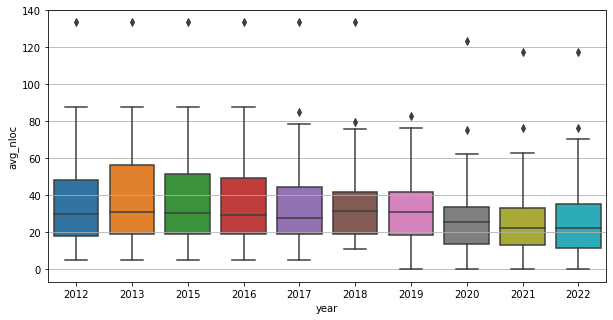

In [173]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="avg_nloc", data=loc_per_method, ax=axes)
axes.grid(visible=True, axis="y")
fig.savefig("figures/LOC/lizard_year_vs_avg_loc_per_method.jpg")

353

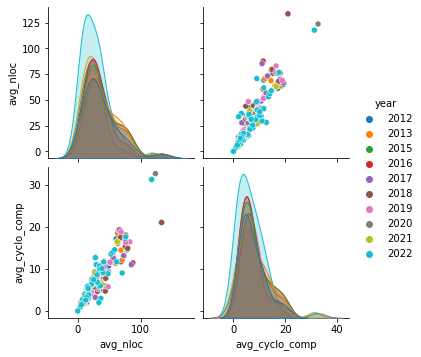

In [174]:
fig = sb.pairplot(data=loc_per_method, hue="year")
fig.savefig("figures/corr_year_vs_loc_per_method.jpg")
len(loc_per_method)

<AxesSubplot:>

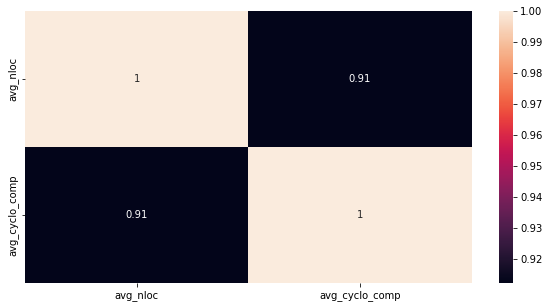

In [175]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.heatmap(data=loc_per_method.corr(),annot=True, ax=axes)

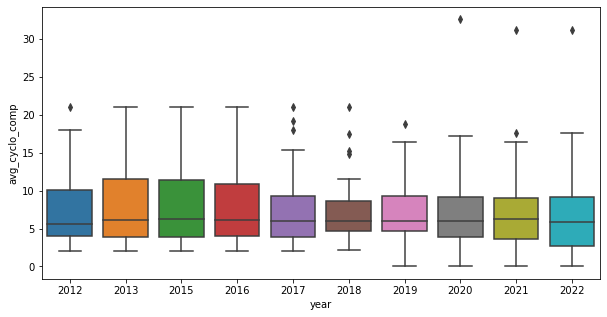

In [176]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="avg_cyclo_comp", data=loc_per_method, ax=axes)
fig.savefig("figures/Comp/lizard_year_vs_avg_cyclo_per_method.jpg")

In [177]:

methods = {       "file_name": [],
                  "year": [],
                  "method_name": [],
                  "method_nloc": [],
                  "method_cyclomatic_complexity": []}
for file in os.scandir("data/LOC_and_Complexity/byfile/bymethod"):
    file_year = file.name[:4]
    if file.is_file and file.name.endswith(".json"):
        data_file = open(file)
        data_file = json.load(data_file)
        for odin_file_name in data_file:
            for methode_odin in data_file[odin_file_name]["method_info"]:
                #print(methode_odin)
                filename, filetype = odin_file_name.split(".")
                methods["file_name"].append(filename)
                methods["year"].append(int(file_year))
                methods["method_name"].append(methode_odin["method_name"])
                methods["method_nloc"].append(methode_odin["method_nloc"])
                methods["method_cyclomatic_complexity"].append(methode_odin["method_cyclomatic_complexity"])
methods = pd.DataFrame(methods)
methods

,file_name,year,method_name,method_nloc,method_cyclomatic_complexity
0,activity_estimation,2012,activity_estimation,9,1
1,activity_estimation,2012,calc_transition_density,70,19
2,activity_estimation,2012,initialize_probabilities,61,8
3,activity_estimation,2012,calc_probabilities_and_init_act_data,91,19
4,activity_estimation,2012,boolean_difference,34,5
...,...,...,...,...,...
6613,YYosys,2022,YYosys::set_default_variables,12,3
6614,YYosys,2022,YYosys::execute,29,4
6615,YYosys,2022,YYosys::elaborate,7,1
6616,YYosys,2022,YYosys::output_blif,5,1


In [178]:
methods.groupby("year").describe()

method_nloc                                                       \
           count       mean        std  min    25%   50%   75%    max   
year                                                                    
2012       513.0  33.177388  39.963627  4.0  10.00  18.0  41.0  301.0   
2013       545.0  34.814679  42.892356  4.0  10.00  18.0  42.0  301.0   
2015       648.0  34.554012  43.764017  4.0  10.00  18.0  41.0  335.0   
2016       668.0  34.203593  43.532654  4.0  10.00  18.0  41.0  335.0   
2017       662.0  34.206949  43.590493  3.0  10.00  18.0  41.0  335.0   
2018       644.0  33.077640  43.468265  3.0   9.75  17.0  39.0  335.0   
2019       678.0  32.399705  41.827575  3.0   9.00  17.0  37.0  325.0   
2020       679.0  28.652430  46.716240  3.0   8.00  13.0  31.0  616.0   
2021       704.0  28.279830  46.689524  3.0   7.00  13.0  30.0  615.0   
2022       877.0  28.719498  43.921929  2.0   8.00  14.0  33.0  615.0   

     method_cyclomatic_complexity                                           \
                            count      mean        std  min  25%  50%  75%   
year                                                                         
2012                        513.0  6.912281  10.419432  1.0  2.0  3.0  8.0   
2013                        545.0  7.253211  10.923115  1.0  2.0  3.0  8.0   
2015                        648.0  7.429012  11.071967  1.0  2.0  4.0  9.0   
2016                        668.0  7.374251  11.060311  1.0  2.0  4.0  9.0   
2017                        662.0  7.391239  11.105441  1.0  2.0  4.0  9.0   
2018                        644.0  7.246894  11.068270  1.0  2.0  4.0  8.0   
2019                        678.0  7.222714  10.656817  1.0  2.0  4.0  9.0   
2020                        679.0  7.468336  13.163767  1.0  2.0  4.0  8.0   
2021                        704.0  7.318182  12.605556  1.0  2.0  3.5  8.0   
2022                        877.0  7.233751  12.052827  1.0  2.0  4.0  8.0   

             
        max  
year         
2012  117.0  
2013  118.0  
2015  118.0  
2016  123.0  
2017  123.0  
2018  123.0  
2019  136.0  
2020  154.0  
2021  155.0  
2022  155.0

In [179]:
methods.groupby("file_name").count()

,year,method_name,method_nloc,method_cyclomatic_complexity
file_name,,,,
BLIFElaborate,13,13,13,13
BLIFReader,41,41,41,41
BLIFWriter,18,18,18,18
BlockMemories,29,29,29,29
Division,6,6,6,6
...,...,...,...,...
simulate_blif,841,841,841,841
soft_logic_def_parser,4,4,4,4
string_cache,87,87,87,87


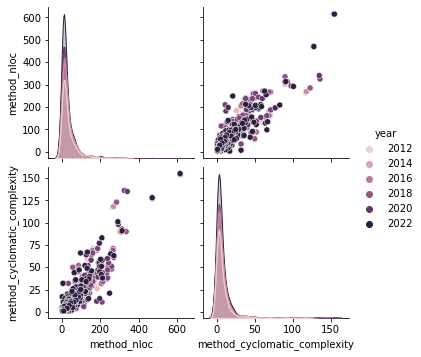

In [180]:
sb.pairplot(methods, hue="year")

<AxesSubplot:>

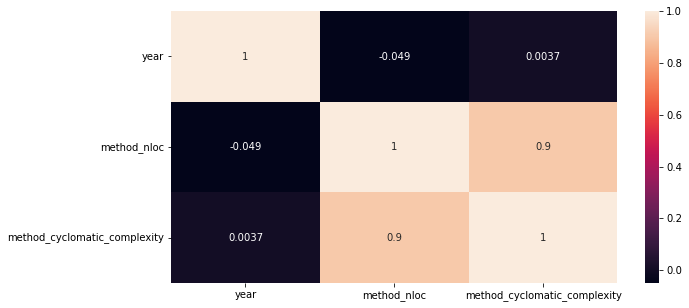

In [181]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.heatmap(data=methods.corr(),annot=True, ax=axes)

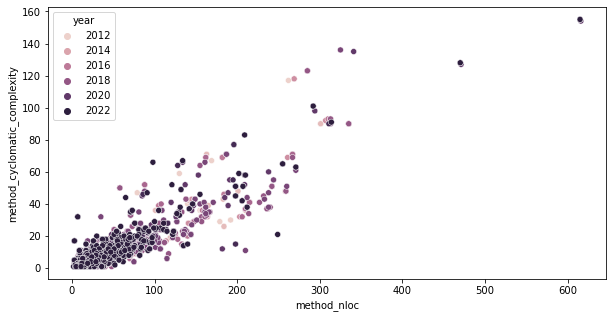

In [182]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.scatterplot(x="method_nloc", y="method_cyclomatic_complexity", data=methods,ax=axes, hue="year")
fig.savefig("figures/corr_complexity_nloc.jpg")

In [183]:
from scipy import stats
stats.spearmanr(a=methods["method_nloc"].values, b=methods["method_cyclomatic_complexity"].values,
                alternative="greater")
                #alternative="two-sided")

SpearmanrResult(correlation=0.8449364826496786, pvalue=0.0)

In [184]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    g = total / (len(x)**2 * np.mean(x))
    return (len(x) * g) / (len(x) - 1)


print(gini(methods[methods["year"] == 2012]["method_cyclomatic_complexity"]))
print(gini(methods[methods["year"] == 2013]["method_cyclomatic_complexity"]))
print(gini(methods[methods["year"] == 2014]["method_cyclomatic_complexity"]))
print(gini(methods[methods["year"] == 2015]["method_cyclomatic_complexity"]))
print(gini(methods[methods["year"] == 2016]["method_cyclomatic_complexity"]))
print(gini(methods[methods["year"] == 2017]["method_cyclomatic_complexity"]))
print(gini(methods[methods["year"] == 2018]["method_cyclomatic_complexity"]))
print(gini(methods[methods["year"] == 2019]["method_cyclomatic_complexity"]))
print(gini(methods[methods["year"] == 2020]["method_cyclomatic_complexity"]))

0.5693056436830232
0.5781861505037127
nan
0.5688098019108357
0.5674069177347988
0.569715357979985
0.5730927017765783
0.5648190237353288
0.5982174072128577


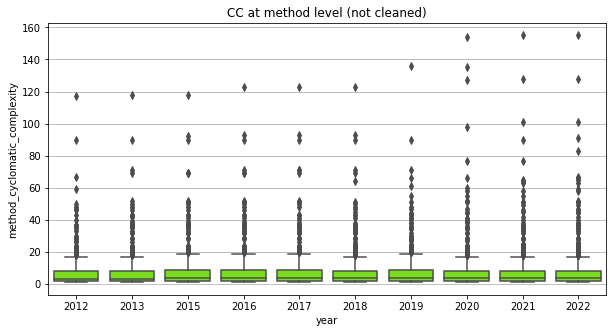

In [185]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="method_cyclomatic_complexity", data=methods,ax=axes, color="lawngreen")
axes.set_title("CC at method level (not cleaned)")
axes.grid(visible=True, axis="y")
fig.savefig("figures/Comp/scc_year_vs_cc_method_level.jpg")

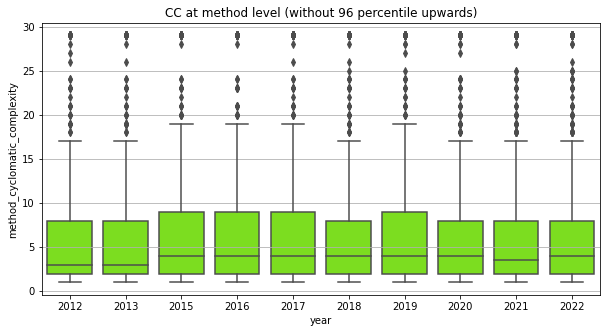

In [186]:
methods["method_cyclomatic_complexity"].clip(upper=methods["method_cyclomatic_complexity"].quantile(.96), inplace=True)
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="method_cyclomatic_complexity", data=methods,ax=axes,  color="lawngreen")
axes.set_title("CC at method level (without 96 percentile upwards)")
axes.grid(visible=True, axis="y")
fig.savefig("figures/Comp/scc_year_vs_cc_method_level_cleaned.jpg")

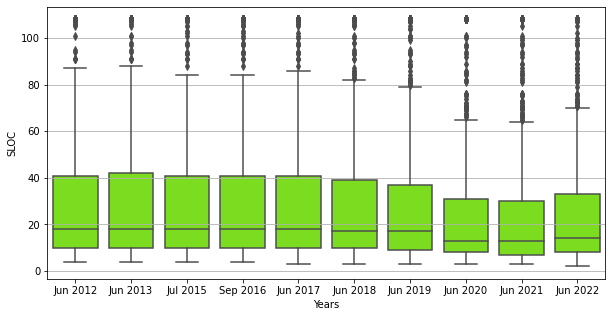

In [196]:
methods["method_nloc"].clip(upper=methods["method_nloc"].quantile(.95), inplace=True)
horizontal_labels = ["Jun 2012",
                     "Jun 2013",
                     "Jul 2015",
                     "Sep 2016",
                     "Jun 2017",
                     "Jun 2018",
                     "Jun 2019",
                     "Jun 2020",
                     "Jun 2021",
                     "Jun 2022"]
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="method_nloc", data=methods,ax=axes, color="lawngreen")
axes.grid(visible=True, axis="y")
#axes.set_title("Method SLOC per year (upper bound 95 percentile)")
axes.set_xlabel("Years")
axes.set_ylabel("SLOC")
axes.set_xticklabels(horizontal_labels)
fig.savefig("figures/LOC/10_lizard_year_vs_loc_per_method.svg", format='svg', dpi=1200)

<AxesSubplot:xlabel='year', ylabel='method_nloc'>

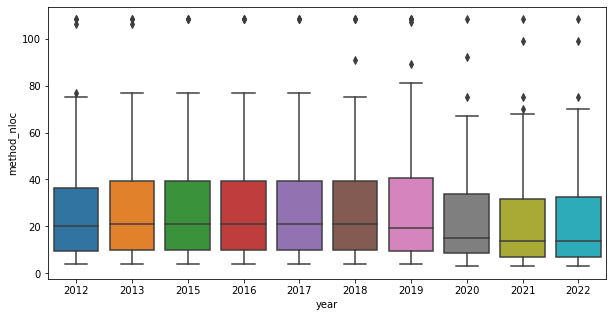

In [188]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year",y="method_nloc", data=methods[methods["file_name"] == "simulate_blif"],ax=axes)

In [189]:
methods.groupby("year").describe()

method_nloc                                                        \
           count       mean        std  min    25%   50%   75%     max   
year                                                                     
2012       513.0  30.166374  29.189041  4.0  10.00  18.0  41.0  108.15   
2013       545.0  31.049725  29.969986  4.0  10.00  18.0  42.0  108.15   
2015       648.0  30.611960  29.231553  4.0  10.00  18.0  41.0  108.15   
2016       668.0  30.331437  29.012581  4.0  10.00  18.0  41.0  108.15   
2017       662.0  30.367674  29.195976  3.0  10.00  18.0  41.0  108.15   
2018       644.0  29.309161  29.033606  3.0   9.75  17.0  39.0  108.15   
2019       678.0  29.009218  28.799650  3.0   9.00  17.0  37.0  108.15   
2020       679.0  24.888807  26.887981  3.0   8.00  13.0  31.0  108.15   
2021       704.0  24.496023  26.673038  3.0   7.00  13.0  30.0  108.15   
2022       877.0  25.485519  26.450043  2.0   8.00  14.0  33.0  108.15   

     method_cyclomatic_complexity                                          \
                            count      mean       std  min  25%  50%  75%   
year                                                                        
2012                        513.0  6.216374  6.812067  1.0  2.0  3.0  8.0   
2013                        545.0  6.438532  7.065891  1.0  2.0  3.0  8.0   
2015                        648.0  6.575617  6.965170  1.0  2.0  4.0  9.0   
2016                        668.0  6.532934  6.926935  1.0  2.0  4.0  9.0   
2017                        662.0  6.551360  6.985586  1.0  2.0  4.0  9.0   
2018                        644.0  6.416149  6.943728  1.0  2.0  4.0  8.0   
2019                        678.0  6.492625  6.919186  1.0  2.0  4.0  9.0   
2020                        679.0  6.337261  6.988377  1.0  2.0  4.0  8.0   
2021                        704.0  6.264205  6.964741  1.0  2.0  3.5  8.0   
2022                        877.0  6.262258  6.843128  1.0  2.0  4.0  8.0   

            
       max  
year        
2012  29.0  
2013  29.0  
2015  29.0  
2016  29.0  
2017  29.0  
2018  29.0  
2019  29.0  
2020  29.0  
2021  29.0  
2022  29.0

# Set LOC CC and Code Coverage into relation

[0 1 2 3 4 5 6 7 8 9]
[0.11514231072111598, 0.11440100882723833, 0.05612637486986828, 0.021814597351390734, -0.0054525627044711015, -0.06591599190283401, 0.040949930019413966, -0.11099063150589868, 0.023369273552227156, 0.2758867276887872]


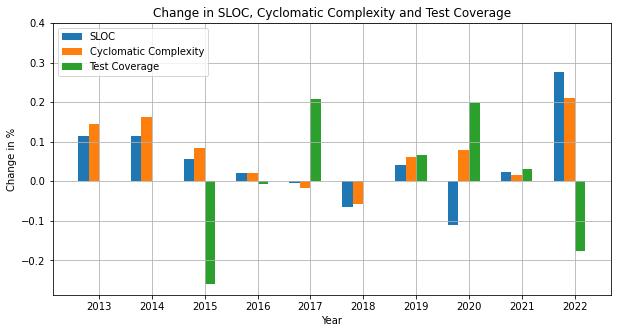

In [190]:
years = ["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = 0.2
print(ind)
print(increase_nloc)
axes.bar(ind, increase_nloc, width, label="SLOC")
axes.bar(ind+width, increase_complexity, width, label="Cyclomatic Complexity")
axes.bar(ind+width*2, increase_coverage, width, label="Test Coverage")
axes.legend(loc='upper left')
axes.set_xlabel("Year")
axes.set_ylabel("Change in %")
axes.set_title("Change in SLOC, Cyclomatic Complexity and Test Coverage")
#axes.set_xticks(ticks=list(range(len(years))))
axes.set_xticks(ticks=np.array(range(len(years))) + 0.3)
axes.set_yticks(np.linspace(start=-0.2, stop=0.4, num=7))
axes.set_xticklabels(years)
axes.grid(visible=True)
fig.savefig("figures/year_vs_metric_increase.jpg")